<a href="https://colab.research.google.com/github/muhamadfadil316/MACHINE-LEARNING/blob/main/Praktikum07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# menghubungan colab dengan google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# memanggil data set lewat gdrive
path = "/content/gdrive/MyDrive/Colab Notebooks/praktikum_ml/praktikum07/notebooks"

In [4]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/praktikum_ml/praktikum07/data/apples_and_oranges.csv")
df.head()

,Weight,Size,Class
0,69,4.39,orange
1,69,4.21,orange
2,65,4.09,orange
3,72,5.85,apple
4,67,4.70,orange


In [5]:
df["Class"].unique()

array(['orange', 'apple'], dtype=object)

In [6]:
df["Class"].value_counts()

,count
Class,
orange,20
apple,20


In [7]:
X = df[['Weight', 'Size']]

#Kolom target (label)
y = df['Class']

In [8]:
X.head()

,Weight,Size
0,69,4.39
1,69,4.21
2,65,4.09
3,72,5.85
4,67,4.70


In [9]:
y.head()

,Class
0,orange
1,orange
2,orange
3,apple
4,orange


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Jumlah data latih:", len(X_train))
print("Jumlah data uji:", len(X_test))

Jumlah data latih: 32
Jumlah data uji: 8


In [11]:
#Membuat model SVM dengan kernel linear
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [12]:
y_pred = model.predict(X_test)
#akurasi
print(f"Akurasi: {accuracy_score(y_test, y_pred) * 100:.2f}%")
#laporan klasifikasi
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))

Akurasi: 100.00%

Laporan Klasifikasi:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00         3
      orange       1.00      1.00      1.00         5

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8




Confusion Matrix:
 [[3 0]
 [0 5]]


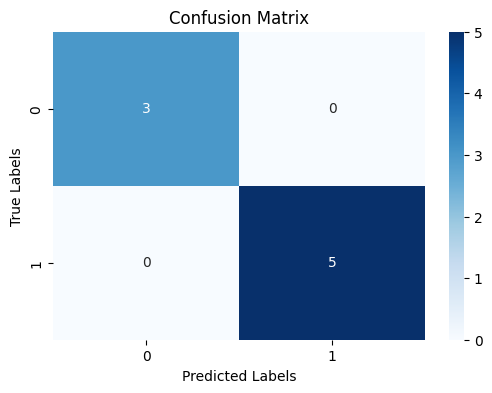

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

#buat confusion matrix
cm = confusion_matrix(y_test, y_pred)

#jika kita tau nama kelas (opsional, agar lebih informatif)
#misalnya: class_names = ['Negatif', 'Positif']
#maka tambahkan ke heatmap di bagian "xticklabels" dan "yticklabels"

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

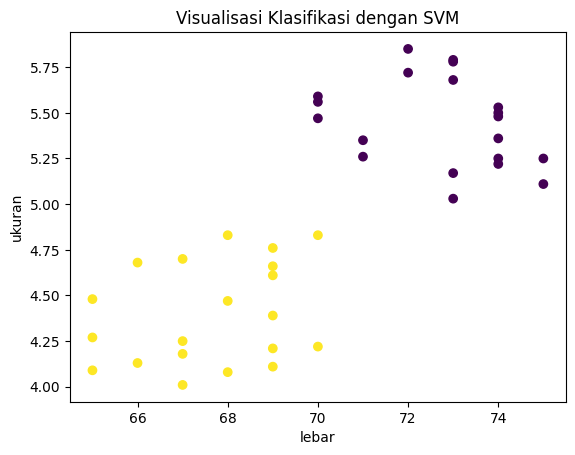

In [14]:
import matplotlib.pyplot as pls

plt.scatter(df['Weight'], df['Size'], c=df['Class'].astype('category').cat.codes)
plt.xlabel('lebar')
plt.ylabel('ukuran')
plt.title('Visualisasi Klasifikasi dengan SVM')
plt.show()

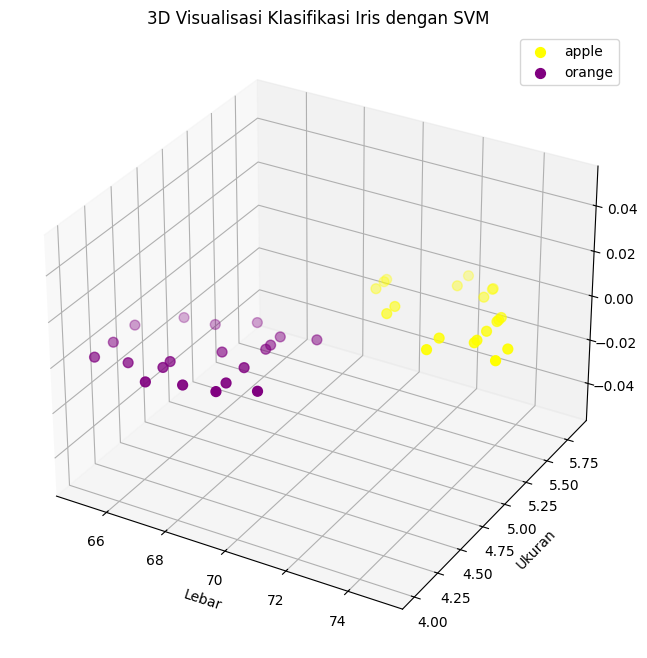

In [15]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# 3. Encode label (ubah teks jadi angka)
le = LabelEncoder()
df['ClassEncoded'] = le.fit_transform(df['Class'])

# 8. Plot 3D hasil klasifikasi
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Warna untuk tiap kelas
colors = ['yellow', 'purple']
labels = le.classes_

# Plot tiap spesies dengan warna berbeda
for i, species in enumerate(labels):
    subset = df[df['ClassEncoded'] == i]
    ax.scatter(
        subset['Weight'],
        subset['Size'],
        color=colors[i],
        label=species,
        s=50
    )

ax.set_xlabel('Lebar')
ax.set_ylabel('Ukuran')
ax.set_title('3D Visualisasi Klasifikasi Iris dengan SVM')
ax.legend()
plt.show()